## Argumentation Mining in US Presidential Debates. Experiment Set 1 

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [229]:
filename = 'sentence_db_candidate.csv'
df = pd.read_csv(filename)

In [230]:
df.shape

(29621, 18)

In [231]:
def preproc(sentence):
    sentence = sentence.lower()
    sentence = ''.join([i for i in sentence if i not in string.punctuation])
    return sentence

In [232]:
df['Speech'] = df['Speech'].apply(preproc)

In [233]:
df.head()

,Text,Part,Document,Order,Sentence,Start,End,Annotator,Tag,Component,Speech,Speaker,SpeakerType,Set,Date,Year,Name,MainTag
0,"CHENEY: Gwen, I want to thank you, and I want ...",1,30_2004,0,0,2101,2221,NaN,"{""O"": 27}",O,gwen i want to thank you and i want to thank ...,CHENEY,Candidate,TRAIN,05 Oct 2004,2004,Richard(Dick) B. Cheney,O
1,"It's a very important event, and they've done ...",1,30_2004,1,1,2221,2304,NaN,"{""O"": 19}",O,its a very important event and theyve done a s...,CHENEY,Candidate,TRAIN,05 Oct 2004,2004,Richard(Dick) B. Cheney,O
2,It's important to look at all of our developme...,1,30_2004,2,2,2304,2418,NaN,"{""O"": 23}",O,its important to look at all of our developmen...,CHENEY,Candidate,TRAIN,05 Oct 2004,2004,Richard(Dick) B. Cheney,O
3,"And, after 9/11, it became clear that we had t...",1,30_2004,3,3,2418,2744,NaN,"{""O"": 16, ""Claim"": 50}",Claim,and after 911 it became clear that we had to d...,CHENEY,Candidate,TRAIN,05 Oct 2004,2004,Richard(Dick) B. Cheney,Claim
4,And we also then finally had to stand up democ...,1,30_2004,4,4,2744,2974,NaN,"{""O"": 4, ""Claim"": 13, ""Premise"": 25}",Premise,and we also then finally had to stand up democ...,CHENEY,Candidate,TRAIN,05 Oct 2004,2004,Richard(Dick) B. Cheney,Mixed


### Task 1: Arguments (Claims + Premises) vs Non-Arguments 

In [234]:
valid = ['Claim', 'Premise', 'O']
df = df.loc[(df['Component'].isin(valid))]

In [235]:
df.shape

(29532, 18)

In [236]:
#turning labels into two classes 
classes = []

for s in df.Component:
    if s == 'O':
        classes.append(0.0)
    else:
        classes.append(1.0)

In [237]:
df['Annotation'] = classes

In [238]:
df.Annotation.value_counts()

1.0    22280
0.0     7252
Name: Annotation, dtype: int64

In [239]:
#splitting as the authors did 
df_train = df[df['Set'] == 'TRAIN']
df_val = df[df['Set'] == 'VALIDATION']
df_test = df[df['Set'] == 'TEST']

In [240]:
X_train = df_train.Speech
y_train = df_train.Annotation

X_test = df_test.Speech
y_test = df_test.Annotation

In [241]:
bow = CountVectorizer()
bow_train = bow.fit_transform(X_train).toarray()
bow_test = bow.transform(X_test).toarray()

In [243]:
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(bow_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [214]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='hinge')
clf.fit(bow_train, y_train)

SGDClassifier()

In [215]:
y_pred_train_sgd = clf.predict(bow_train)
y_pred_test_sgd = clf.predict(bow_test)

In [244]:
#y_pred_train_svm = svm.predict(bow_train)
y_pred_test_svm = svm.predict(bow_test)

In [216]:
#classification report on test set SGD
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_test_sgd, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.53      0.38      0.44      1880
     class 1       0.84      0.90      0.87      6575

    accuracy                           0.79      8455
   macro avg       0.68      0.64      0.66      8455
weighted avg       0.77      0.79      0.77      8455



In [245]:
#classification report on test set SVM
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_test_svm, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.49      0.42      0.45      1880
     class 1       0.84      0.87      0.86      6575

    accuracy                           0.77      8455
   macro avg       0.67      0.65      0.65      8455
weighted avg       0.76      0.77      0.77      8455



#### Authors results on Task 1

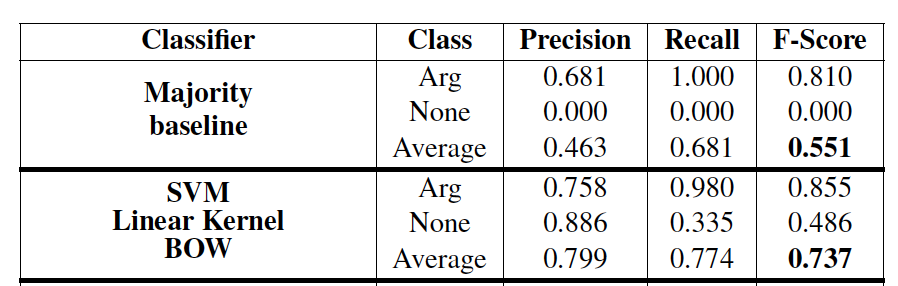

### Task 2: Claims vs Premises

In [246]:
df = pd.read_csv(filename)

In [247]:
comps = ['Claim', 'Premise']
df = df.loc[(df['Component'].isin(comps))]

In [248]:
#turning labels into two classes 
classes = []

for s in df.Component:
    if s == 'Claim':
        classes.append(1.0)
    else:
        classes.append(0.0)

In [249]:
df['Annotation'] = classes

In [250]:
df.shape

(22280, 19)

In [251]:
#splitting as the authors did 
df_train = df[df['Set'] == 'TRAIN']
df_val = df[df['Set'] == 'VALIDATION']
df_test = df[df['Set'] == 'TEST']

In [252]:
X_train = df_train.Speech
y_train = df_train.Annotation

X_test = df_test.Speech
y_test = df_test.Annotation

In [253]:
bow = CountVectorizer()
bow_train = bow.fit_transform(X_train).toarray()
bow_test = bow.transform(X_test).toarray()

In [226]:
clf = SGDClassifier(loss='hinge')
clf.fit(bow_train, y_train)

SGDClassifier()

In [227]:
y_pred_train_sgd = clf.predict(bow_train)
y_pred_test_sgd = clf.predict(bow_test)

In [228]:
#classification report on test set SGD
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_test_sgd, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.64      0.48      0.55      3214
     class 1       0.60      0.74      0.66      3361

    accuracy                           0.61      6575
   macro avg       0.62      0.61      0.61      6575
weighted avg       0.62      0.61      0.61      6575



In [254]:
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(bow_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [255]:
#y_pred_train_svm = svm.predict(bow_train)
y_pred_test_svm = svm.predict(bow_test)

In [256]:
#classification report on test set
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_test_svm, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.62      0.52      0.56      3214
     class 1       0.60      0.70      0.65      3361

    accuracy                           0.61      6575
   macro avg       0.61      0.61      0.60      6575
weighted avg       0.61      0.61      0.61      6575



#### Authors results on Task 2

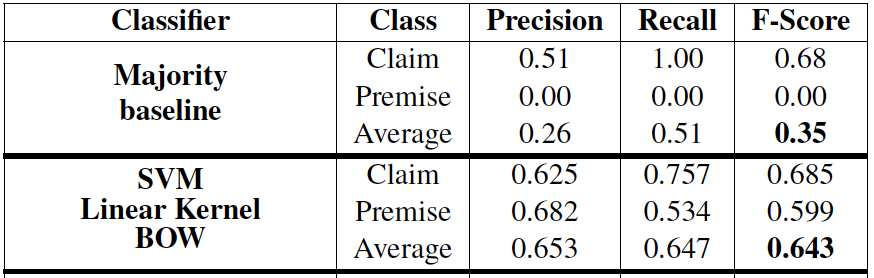